In [3]:
#pip install tweepy
import tweepy
from datetime import datetime, date, time, timedelta
import calendar
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import json
import os
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
consumer_key = "wJrU63rYNS51kIMsQFkbml3Ou"
consumer_secret = "pQt1yClOnRomMvUn1LGb9poDUZXAlJE3dSLrKjUAmBRakxvc2Q"
access_token = "250372770-hEGkVutoyVzn4f0kmahzNNiVqcxCY17eCiBXGvtc" 
access_token_secret = "YSlFipxdcEoxWHHrrgebQqa0iAb3jFODjliNXg2nvuXeZ"

## valores del token a setear


In [7]:
#SETEAO DE API CON LOS VALORES
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
#Se muestra las publicaciones del USUARIO
cont = 0
usuario = 'ecuarauz'
twt = api.user_timeline(usuario, tweet_mode="extended",count='200')
for tweet in twt:
  cont += 1  
  a = tweet.full_text.split()  
  fe = datetime.today() - tweet.created_at 
  print("CONTENIDO...",tweet.full_text ,"https://twitter.com/"+usuario+"/status/"+str(tweet.id),"  tamaño.... ",len(a) - 1," Cantidad de retweets....",tweet.retweet_count ," Cantidad de favoritos.......",tweet.author.favourites_count, "   Fecha....." , fe.days)
   
  print("***********************************")


CONTENIDO... @diegodeguez que descanses en la paz de la constancia y de la sabiduría. https://twitter.com/ecuarauz/status/1404282352046678019   tamaño....  12  Cantidad de retweets.... 185  Cantidad de favoritos....... 4460    Fecha..... 0
***********************************
CONTENIDO... RT @pierinaescorrea: [Boletín] 📃

📌 Comisión de Protección Integral a Niñas, Niños y Adolescentes aprobó plan de trabajo para el próximo se… https://twitter.com/ecuarauz/status/1403935506954588160   tamaño....  21  Cantidad de retweets.... 59  Cantidad de favoritos....... 4460    Fecha..... 1
***********************************
CONTENIDO... RT @TaxJusticeNet: We’re delighted to announce the programme for Tax Justice Network’s 2021 conference! Registration is now open for #TJN21… https://twitter.com/ecuarauz/status/1403127762907549701   tamaño....  19  Cantidad de retweets.... 38  Cantidad de favoritos....... 4460    Fecha..... 3
***********************************
CONTENIDO... RT @LosTiemposBol: Inform

In [11]:
list_conten = []
list_urls = []
list_palabras = []
list_favoritos = []
list_dias = []
list_retweet = []
cont = 0
for tweet in tweepy.Cursor(api.search,q='ecuarauz', lang="es",tweet_mode="extended").items(5000):
#for tweet in api.search(q="guillermo lasso", tweet_mode="extended", count="115"):
  if 'retweeted_status' in tweet._json:
    cont += 1  
    list_urls.append("https://twitter.com/user/status/"+str(tweet.id))
    
    list_conten.append(tweet.retweeted_status.full_text)
    list_palabras.append(len(a) - 1) 
    a = tweet.retweeted_status.full_text.split() 
    f = datetime.today() - tweet.created_at 
    list_dias.append(f.days) 
    list_retweet.append(tweet.retweet_count)
    list_favoritos.append(tweet.favorite_count)
    print("------- si")
  else:
    cont += 1 
    list_conten.append(tweet.full_text) 
    list_urls.append("https://twitter.com/user/status/"+str(tweet.id)) 
    a = tweet.full_text.split() 
    list_palabras.append(len(a) - 1) 
    list_favoritos.append(tweet.favorite_count) 
    f = datetime.today() - tweet.created_at 
    list_dias.append(f.days)
    
    list_retweet.append(tweet.retweet_count) 
    print("-------no")


print(cont)

------- si
-------no
------- si
-------no
------- si
------- si
-------no
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
-------no
------- si
------- si
------- si
------- si
------- si
------- si
-------no
------- si
------- si
------- si
-------no
------- si
------- si
------- si
------- si
------- si
------- si
-------no
-------no
-------no
------- si
------- si
------- si
------- si
------- si
------- si
-------no
------- si
------- si
------- si
-------no
------- si
------- si
------- si
------- si
-------no
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
-------no
-------no
------- si
------- si
------- si
------- si
-------no
-------no
------- si
-------no
------- si
-------no
------- si
------- si
-------no
-------no
------- si
------- si
------- si
-------no
------- si
-------no
------- si

Rate limit reached. Sleeping for: 789


------- si
------- si
-------no
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
-------no
------- si
------- si
------- si
------- si
-------no
-------no
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
-------no
------- si
------- si
-------no
-------no
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
-------no
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
------- si
-------no
------- si
------- si
------- si
------- 

Rate limit reached. Sleeping for: 789


-------no
------- si
------- si
------- si
-------no
------- si
-------no
-------no
-------no
------- si
------- si
------- si
-------no
-------no
-------no
------- si
-------no
------- si
-------no
------- si
-------no
------- si
------- si
-------no
-------no
------- si
-------no
-------no
-------no
------- si
-------no
-------no
------- si
------- si
-------no
-------no
-------no
------- si
------- si
------- si
-------no
-------no
------- si
------- si
------- si
-------no
-------no
------- si
-------no
------- si
------- si
-------no
-------no
-------no
-------no
-------no
------- si
-------no
------- si
-------no
-------no
-------no
------- si
------- si
-------no
------- si
------- si
------- si
-------no
-------no
-------no
-------no
------- si
------- si
-------no
------- si
-------no
-------no
------- si
-------no
------- si
------- si
------- si
-------no
-------no
-------no
-------no
-------no
-------no
-------no
------- si
-------no
-------no
-------no
-------no
------- si

In [13]:
#Se visualiza la el dataframe
examen = {'contenido':list_conten, 'url':list_urls, 'Numero de palabras':list_palabras, 'Numero de favoritos':list_favoritos, 'Numero de dias transcurridos':list_dias, 'Numero de veces retweetiadas':list_retweet}
df = pd.DataFrame(data = examen)
df

,contenido,url,Numero de palabras,Numero de favoritos,Numero de dias transcurridos,Numero de veces retweetiadas
0,Formemos un grupo compacto de tuiteros Correis...,https://twitter.com/user/status/14045285939805...,37,0,0,118
1,@DianaSalazarM2 Que pasó con la información qu...,https://twitter.com/user/status/14045283061967...,18,0,0,0
2,"Con @ecuarauz ,que comparte un modelo económic...",https://twitter.com/user/status/14045281806486...,18,0,0,76
3,@rcpasajefans @MashiRafael @ecuarauz Te sigo👍🇪🇨,https://twitter.com/user/status/14045269853558...,4,0,0,0
4,Formemos un grupo compacto de tuiteros Correis...,https://twitter.com/user/status/14045268103402...,4,0,0,118
...,...,...,...,...,...,...
4995,@GinoMayCry @ecuarauz Calla borrego anda a tra...,https://twitter.com/user/status/14024326419164...,6,0,5,0
4996,¡¡#Perenco está radicada en 🇧🇸Bahamas🇧🇸!!\n\nE...,https://twitter.com/user/status/14024326281589...,6,0,5,403
4997,@ecuarauz habla presidente moral,https://twitter.com/user/status/14024325687006...,3,0,5,0
4998,🚨El resultado de hoy nos devuelve al debate en...,https://twitter.com/user/status/14024325546748...,3,0,5,339


In [15]:
# ll
# lis = []
# for i in df['Numero de veces retweetiadas']:
#   lis.append(i)
# print(max(ll))

In [16]:
df.describe()

,Numero de palabras,Numero de favoritos,Numero de dias transcurridos,Numero de veces retweetiadas
count,5000.00000,5000.000000,5000.000000,5000.00000
mean,23.15580,1.593000,3.155800,103.42440
std,14.75551,24.435719,1.634889,149.89497
min,1.00000,0.000000,0.000000,0.00000
25%,10.00000,0.000000,2.000000,0.00000
50%,21.00000,0.000000,3.000000,21.00000
75%,36.00000,0.000000,5.000000,138.00000
max,65.00000,1220.000000,5.000000,1935.00000


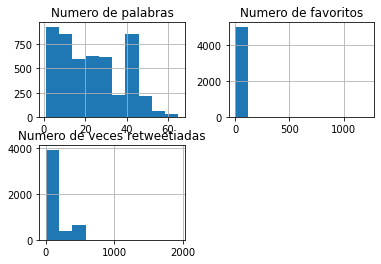

In [19]:
# Visualizamos rápidamente las caraterísticas de entrada
df.drop(['Numero de dias transcurridos','url','contenido'],1).hist()
plt.show()

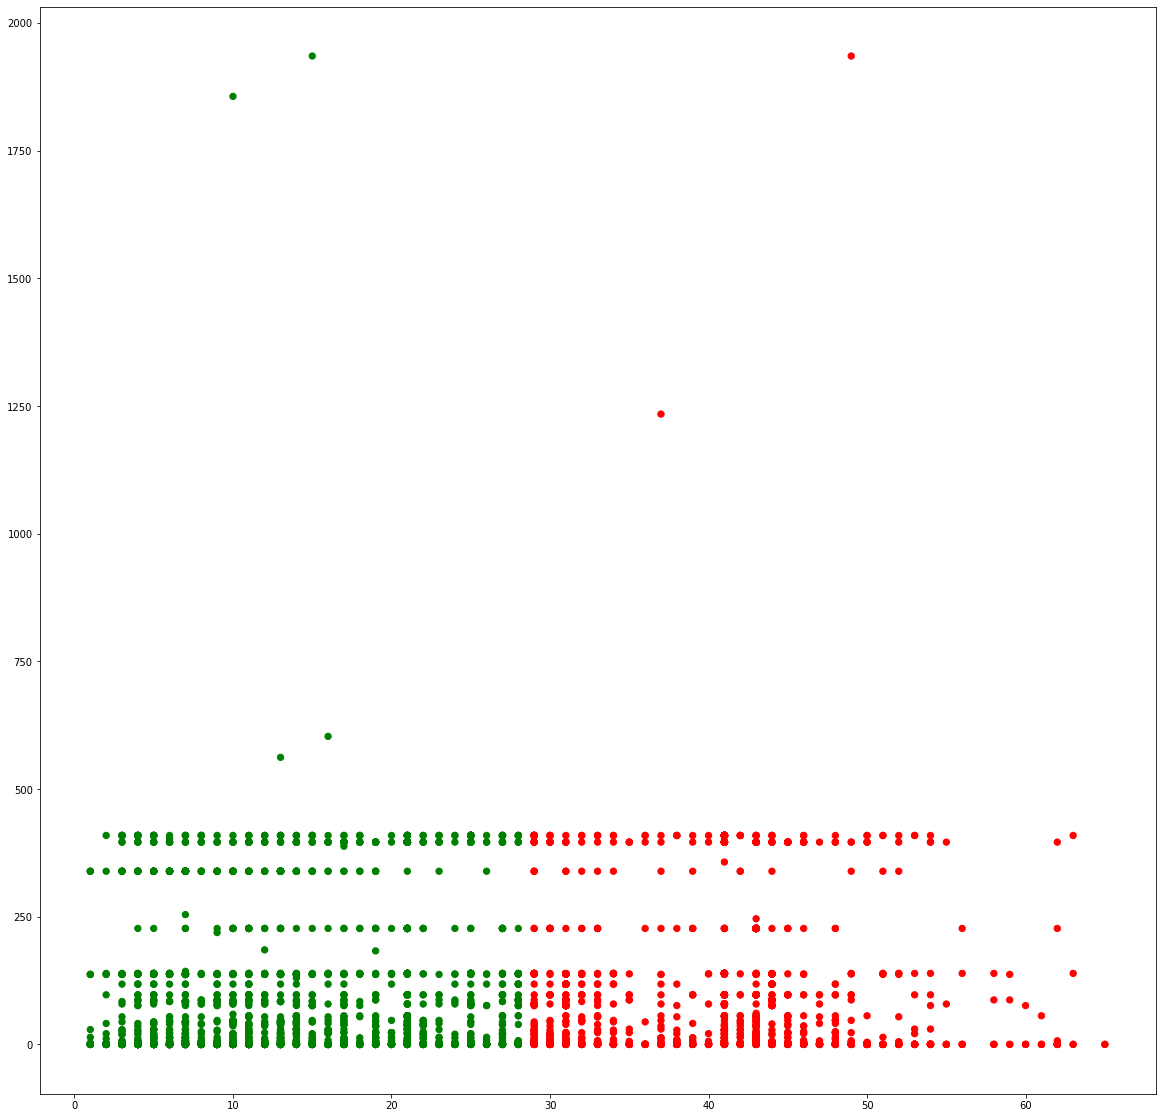

In [20]:
#vamos a Visualizar los datos de entrada
colores=['red','green']
tamanios=[40,80]
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.000
# y en el eje Y: entre 0 y 80.000
filtered_data = df[(df['Numero de palabras'] <= 3000) & (df['Numero de veces retweetiadas'] <= 80000)]

f1 = filtered_data['Numero de palabras'].values
f2 = filtered_data['Numero de veces retweetiadas'].values

# Pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Numero de palabras']>28):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.gcf().set_size_inches(20, 20)
plt.show()

In [24]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Numero de palabras"]]
X_train = np.array(dataX)
y_train = filtered_data['Numero de veces retweetiadas'].values

Creamos el objeto de Regresión Linear

In [25]:
modelo_regresion = linear_model.LinearRegression()


Se entrena la red


In [26]:
modelo_regresion.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = modelo_regresion.predict(X_train)
print('Coefficients: \n', modelo_regresion.coef_) 
print('Independent term: \n', modelo_regresion.intercept_) 
print("Cuadrado medio error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [1.1495375]
Independent term: 
 76.80593946474751
Cuadrado medio error: 22176.36
Variance score: 0.01
